##### 

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Loading the data </h3>


In [50]:
import warnings 
warnings.filterwarnings('ignore')


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# ************** DATA MANIPULATION *****************

import pandas as pd
import numpy as np

# ************** DATA VISUALIZATION ****************

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression

# ************* METRICS ****************************

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook')



In [51]:
df = pd.read_csv('adult3.csv')

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> About the Dataset </h3>

* **Age**: Describes the age of individuals. Continuous.
* **Workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **fnlwgt**: Continuous.
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **education-num**: Number of years spent in education. Continuous.
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex**: Female, Male.
* **capital-gain**: Continuous.
* **capital-loss**: Continuous.
* **hours-per-week**: Continuous.
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* **salary**: >50K,<=50K

In [52]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [54]:
df.isnull().sum().sum()

0

In [55]:
df.duplicated().sum()

24

In [56]:
df.drop_duplicates(inplace=True)

In [57]:
df.duplicated().sum()

0

In [58]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

* The dataset contains absolutely **no null values**! 
* Age, Final Weight, Education Number, Capital Gain, Capital Loss and Hours Per Week are integer columns.
* There are no Float Datatypes in the dataset.
* Workclass, Education, Marital Status, Occupation, Relationship, Race, Sec, Native Country and Income are of object datatypes.
* Although the dataset does not contain any null values, a closer look (see cell 3) tells us that there are a lot of **'?'** values in our dataset. We will have to **replace** those values!

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education.num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital.gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital.loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

* The minimum and maximum age of people in the dataset is 19 and 90 years respectively, while the average age is 37.
* The minimum and maximum years spent on education is 1 and 16 respectively, whereas the mean education level is 10 years.
* While the minimum and average capital gain is 0, maximum is 99999. This seems odd, maybe some error within the data collection.
* The number of hours spent per week varies between 1 to 99 and the average being 40 hours.

In [60]:
df[df == '?'] = np.nan
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       30701 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education.num   32537 non-null  int64 
 5   marital.status  32537 non-null  object
 6   occupation      30694 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital.gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours.per.week  32537 non-null  int64 
 13  native.country  31955 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [61]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

* We can see that the columns **workclass**, **occupation**, and **native.country** contains null values. We would have to find out a way to deal with them!
* There can be many ways to impute missing values, but right now, for the sake of simplicity we would impute them using **mode**!

In [62]:
for col in ['workclass', 'occupation', 'native.country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [63]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

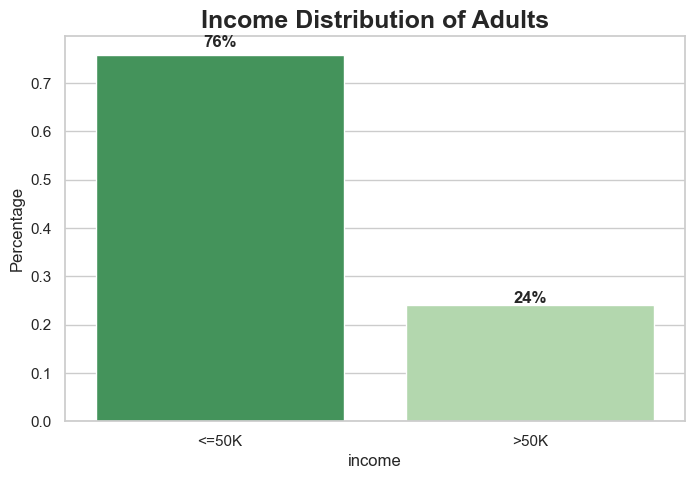

In [64]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Income Distribution of Adults', fontsize=18, fontweight='bold')
eda_percentage = df['income'].value_counts(normalize = True).rename_axis('income').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'income', y = 'Percentage', data = eda_percentage.head(10), palette='Greens_r')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')
    
plt.show()


<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Observation: </h3>

In the EDA Section, I wanted to start by analysing our target variable first. We have come across a very obvious observation!

* The number of people earning more than **50K dollars** an year is one third of the people earning less than it.
* We should also keep in mind that this data was collected in **1996**, so 50K dollars of that tme, might not be the same in today's time!

In [65]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "Greater than 70"

df['age_group'] = df['age'].apply(age_group)

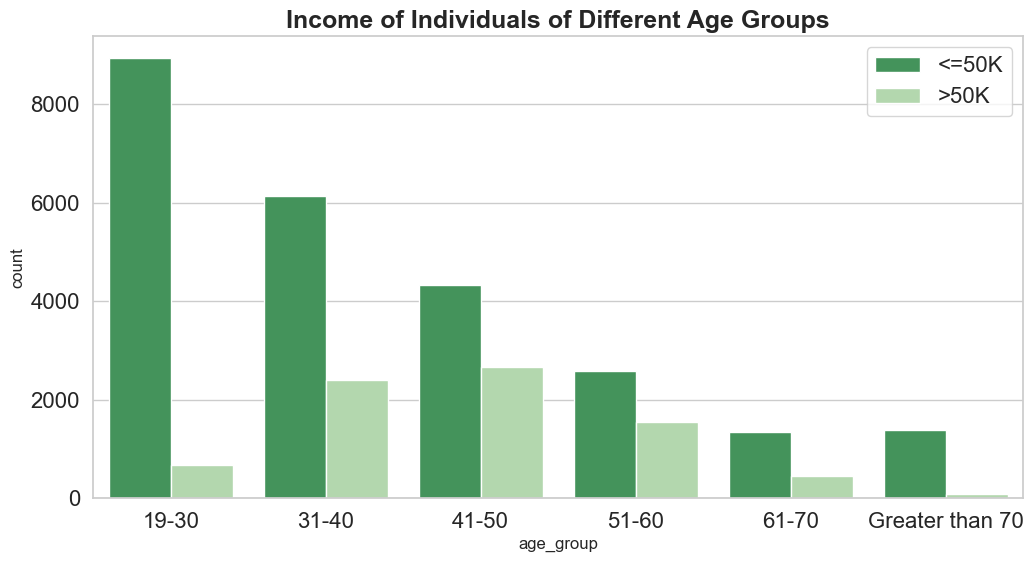

In [66]:
plt.figure(figsize=(12,6))
order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x='age_group', hue='income', data=df, palette='Greens_r', order=order_list)

plt.title('Income of Individuals of Different Age Groups', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

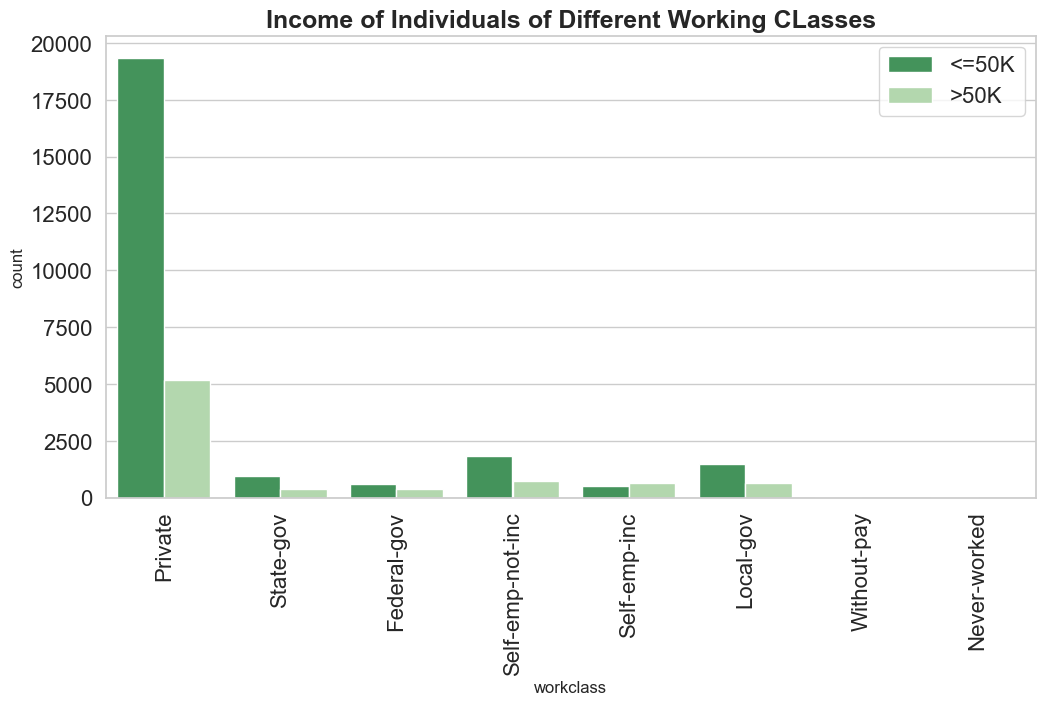

In [67]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x='workclass', hue = df['income'],data=df, palette='Greens_r')
plt.title('Income of Individuals of Different Working CLasses', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

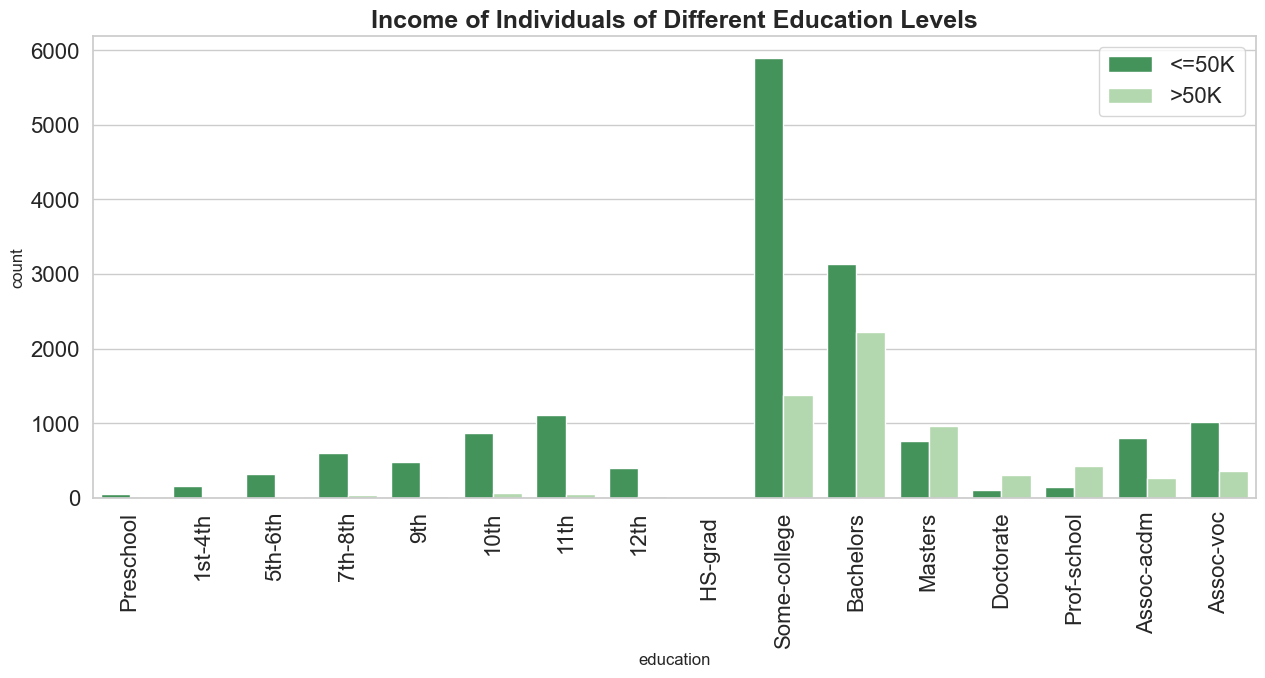

In [68]:
plt.figure(figsize=(15,6))
order_list = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 
                'HS-grad ', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 
              'Assoc-acdm', 'Assoc-voc']
sns.countplot(x='education', hue = df['income'],data=df, palette='Greens_r', order= order_list)
plt.title('Income of Individuals of Different Education Levels', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

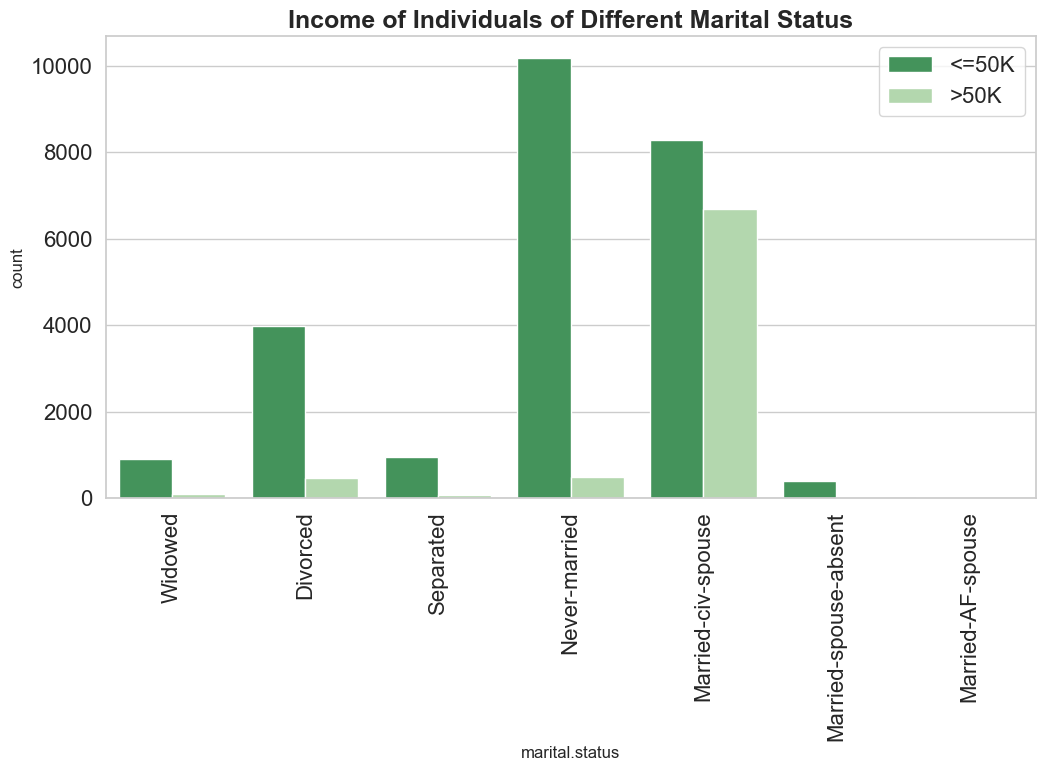

In [69]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x='marital.status', hue = df['income'],data=df, palette='Greens_r')
plt.title('Income of Individuals of Different Marital Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

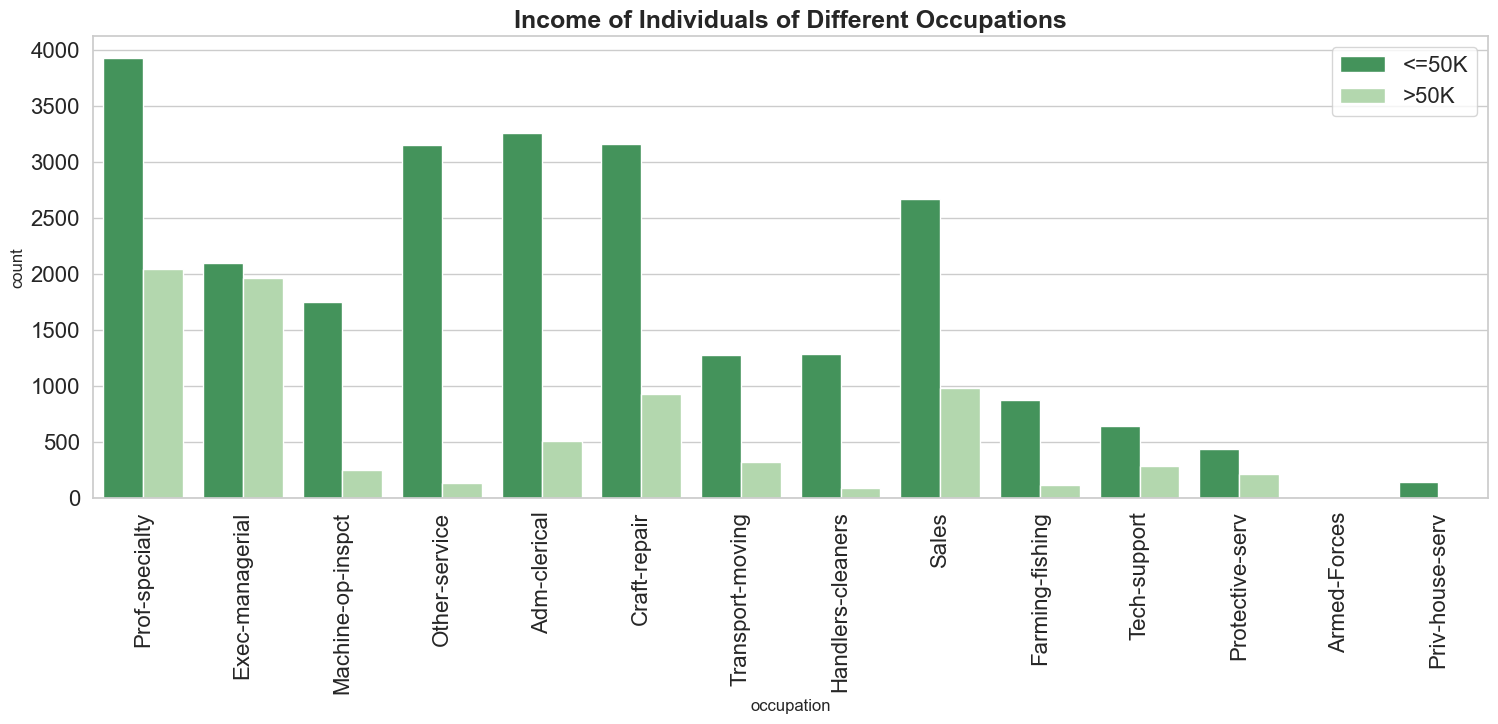

In [70]:
plt.figure(figsize=(18,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x='occupation', hue = df['income'],data=df, palette='Greens_r')
plt.title('Income of Individuals of Different Occupations', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

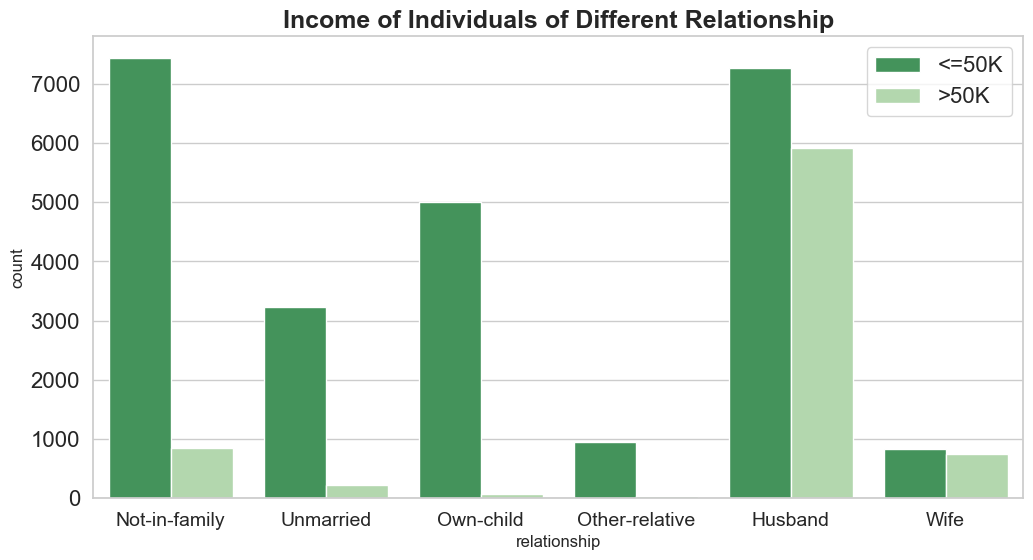

In [71]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x='relationship', hue = df['income'],data=df, palette='Greens_r')
plt.title('Income of Individuals of Different Relationship', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

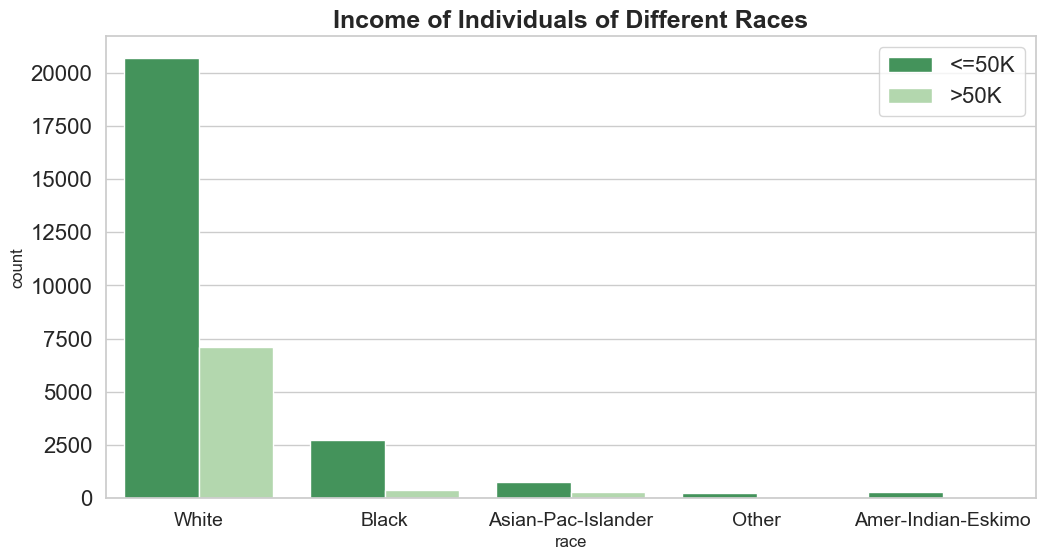

In [72]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x='race', hue = df['income'],data=df, palette='Greens_r')
plt.title('Income of Individuals of Different Races', fontsize=18, fontweight='bold')
plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

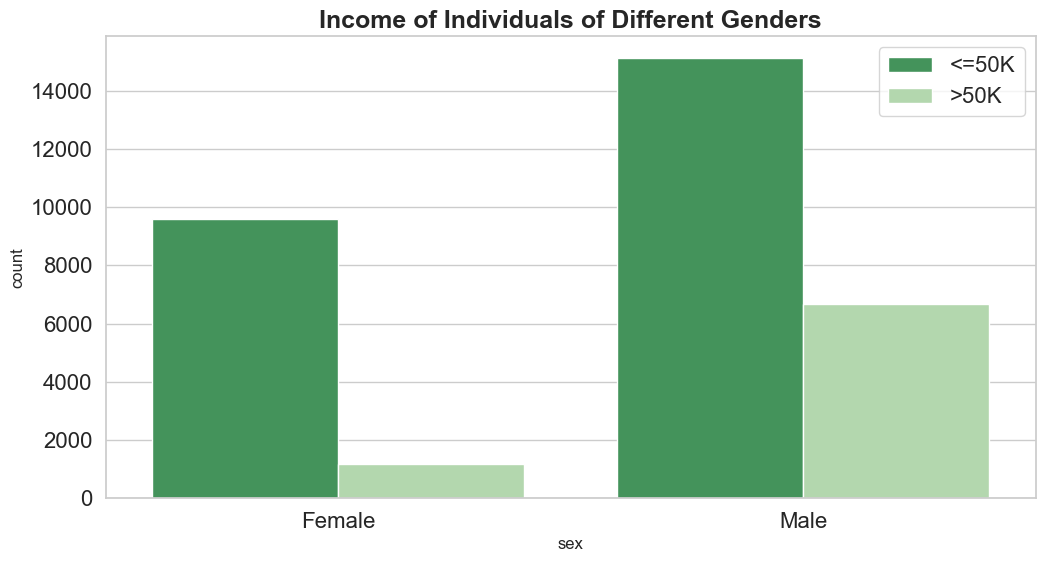

In [73]:
plt.figure(figsize=(12,6))
#order_list = ['19-30', '31-40', '41-50', '51-60', '61-70', 'Greater than 70']
sns.countplot(x='sex', hue = df['income'],data=df, palette='Greens_r')
plt.title('Income of Individuals of Different Genders', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

# Data Preprocessing

In [74]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

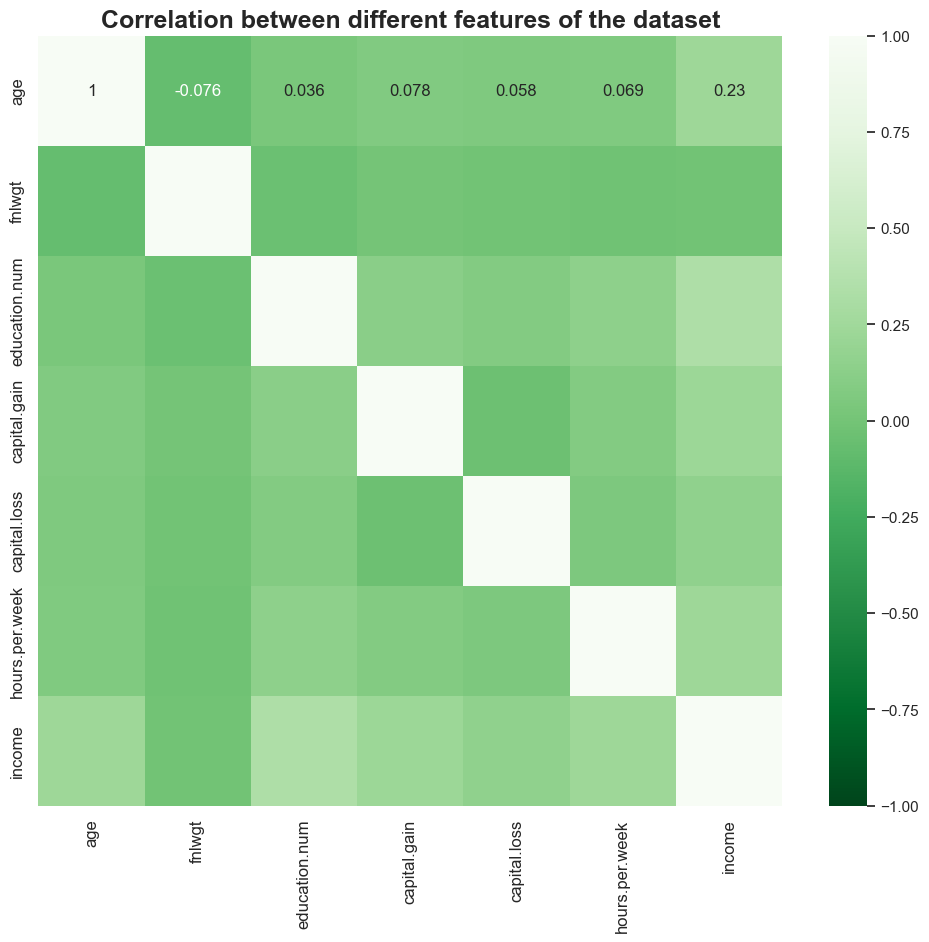

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(12, 10))
plt.title("Correlation between different features of the dataset", fontsize=18, fontweight='bold')
sns.heatmap(numeric_df.corr(), cmap='Greens_r', annot=True, vmin=-1, vmax=1)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12, rotation=90)
plt.show()


## Feature engineering

In [76]:

df.drop(['education.num'], axis = 1, inplace = True)
df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)

df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)


In [77]:
df["marital.status"].unique()


array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [78]:
def simplify_marital_status(x):
    if x in ['Married-civ-spouse', 'Married-AF-spouse']:
        return 'Married'
    elif x == 'Never-married':
        return 'Not-Married'
    else:
        return 'Previously-Married'

df['marital.status'] = df['marital.status'].apply(simplify_marital_status)


In [80]:
df.drop(columns="age_group",axis=1,inplace=True)

In [84]:
df.head()

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,Previously-Married,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,Previously-Married,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,Previously-Married,Prof-specialty,Unmarried,Other,Female,0,4356,40,United-States,0
3,54,Private,140359,School,Previously-Married,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,Previously-Married,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [85]:
df["marital.status"].unique()

array(['Previously-Married', 'Not-Married', 'Married'], dtype=object)

In [86]:
df.columns = df.columns.str.replace('-', '_').str.replace('.', '_')

In [87]:
df.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Private,77053,HS-grad,Previously-Married,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,Previously-Married,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,Previously-Married,Prof-specialty,Unmarried,Other,Female,0,4356,40,United-States,0
3,54,Private,140359,School,Previously-Married,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,Previously-Married,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [88]:
from sklearn.preprocessing import LabelEncoder
categorical = ['workclass','education', 'marital_status', 'occupation', 'relationship',
               'race', 'sex','native_country']
label_encoder = LabelEncoder()
for col in categorical:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

<h3 style = "font-family: Comic Sans MS;background-color:#7DF0A5	"> Logistic Regression using MLE: </h3>




In [89]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
x = df[['workclass','education', 'marital_status', 'occupation', 'relationship',
               'race', 'sex','native_country', 'age','capital_gain', 'capital_loss', 'hours_per_week']]
y = df['income']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
    
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = pd.DataFrame(scaler.fit_transform(x_train), columns = x.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns = x.columns)

In [ ]:
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

acc = accuracy_score(y_test, Y_pred)
print("Logistic Regression",acc)

Logistic Regression 0.8105920917844704


In [92]:
X = df[['workclass','education', 'marital_status', 'occupation', 'relationship',
               'race', 'sex','native_country', 'age', 'fnlwgt', 'capital_gain', 'capital_loss', 'hours_per_week']]
y = df['income']

 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

lr = LogisticRegression(solver='lbfgs', max_iter=10000)
rs = []
acc = []
for i in range(1,25,1):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = i)
    X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)
    model_lr_rs = lr.fit(X_train, y_train)
    predict_values_lr_rs = model_lr_rs.predict(X_test)
    acc.append(accuracy_score(y_test, predict_values_lr_rs))
    rs.append(i)

1 0.8099262446220037
2 0.8080823601720959
3 0.8126920712968654
4 0.8019360786724032
5 0.8096189305470191
6 0.8182237246465888
7 0.8076213890596189
8 0.8073140749846343
9 0.8140749846342963
10 0.81299938537185
11 0.8080823601720959
12 0.8051628764597418
13 0.8056238475722188
14 0.8136140135218193
15 0.81100184388445
16 0.8025507068223725
17 0.8093116164720344
18 0.8085433312845728
19 0.8093116164720344
20 0.8051628764597418
21 0.8057775046097111
22 0.8065457897971727
23 0.8090043023970498
24 0.8085433312845728


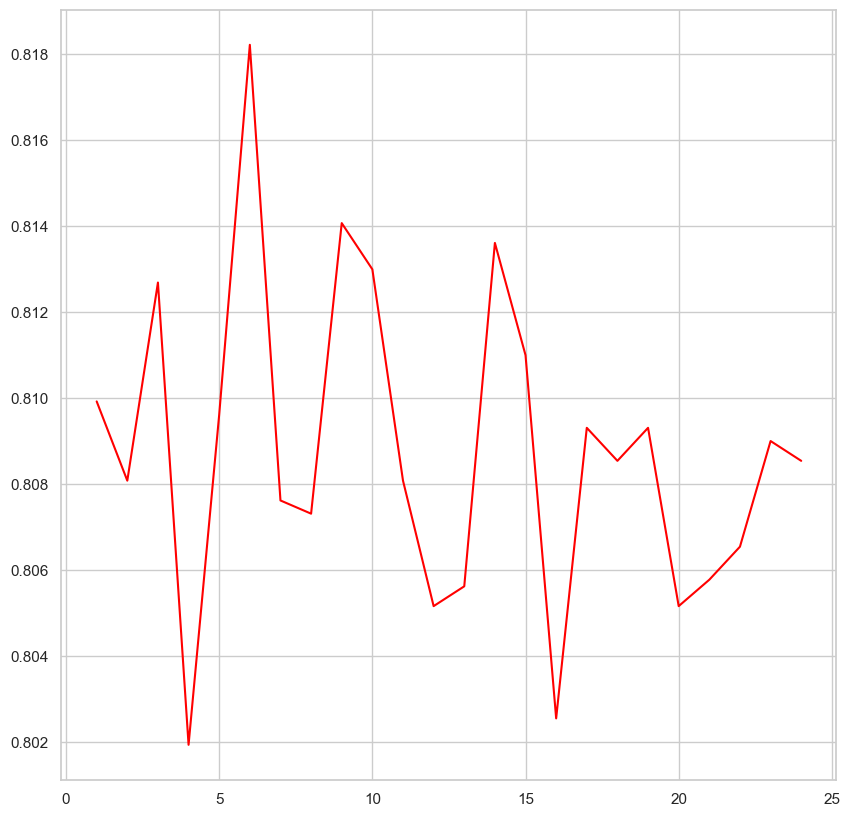

In [93]:
plt.figure(figsize=(10,10))
plt.plot(rs, acc, color ='red')

for i in range(len(rs)):
    print(rs[i],acc[i])

In [95]:
for i in range(0,24):
    if acc[i] > 0.81:
        print(acc[i])

0.8126920712968654
0.8182237246465888
0.8140749846342963
0.81299938537185
0.8136140135218193
0.81100184388445


Accuracy: 0.8085433312845728
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4936
           1       0.68      0.39      0.50      1572

    accuracy                           0.81      6508
   macro avg       0.76      0.67      0.69      6508
weighted avg       0.79      0.81      0.79      6508



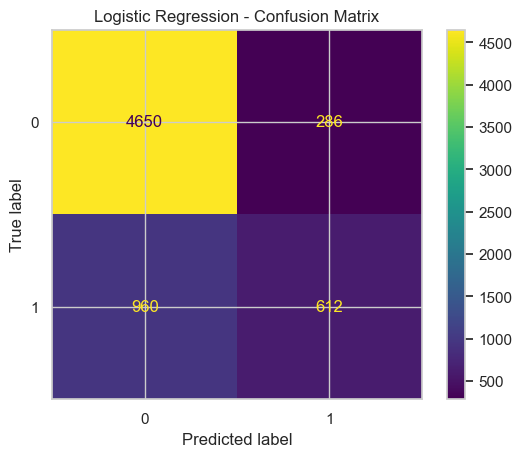

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


K-Nearest Neighbors
Accuracy: 0.8206822372464659
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      4936
           1       0.65      0.55      0.60      1572

    accuracy                           0.82      6508
   macro avg       0.76      0.73      0.74      6508
weighted avg       0.81      0.82      0.82      6508



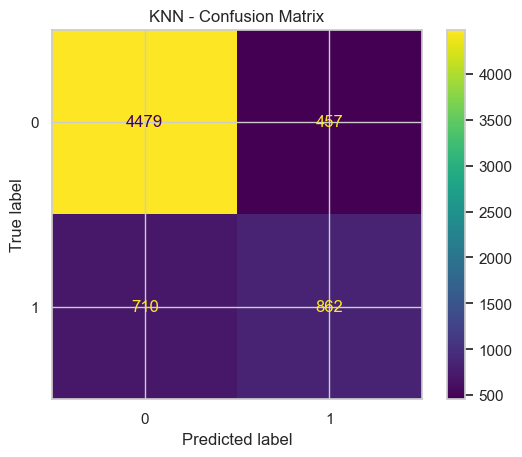

In [99]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("\nK-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.title("KNN - Confusion Matrix")
plt.show()



Decision Tree
Accuracy: 0.8140749846342963
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4936
           1       0.62      0.61      0.61      1572

    accuracy                           0.81      6508
   macro avg       0.75      0.74      0.75      6508
weighted avg       0.81      0.81      0.81      6508



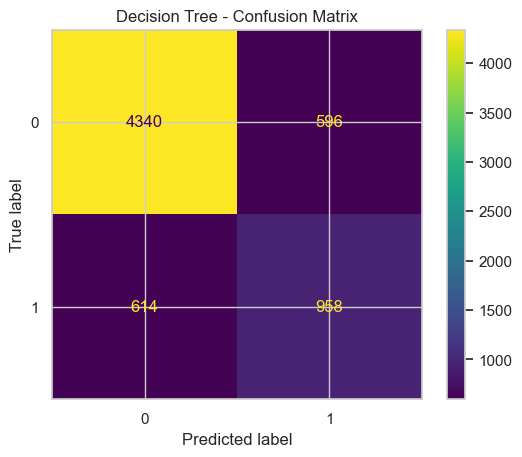

In [104]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("\nDecision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test)
plt.title("Decision Tree - Confusion Matrix")
plt.show()



Random Forest
Accuracy: 0.8537185003073141
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4936
           1       0.75      0.60      0.66      1572

    accuracy                           0.85      6508
   macro avg       0.81      0.77      0.78      6508
weighted avg       0.85      0.85      0.85      6508



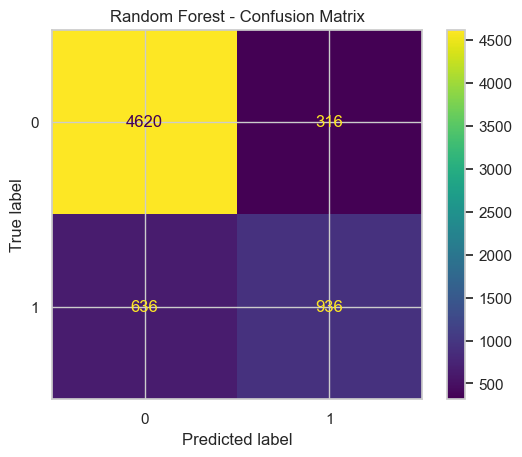

In [100]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nRandom Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.title("Random Forest - Confusion Matrix")
plt.show()


In [101]:
import joblib
joblib.dump(rf, 'model.pkl')
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']


SVM
Accuracy: 0.8232944068838353
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4936
           1       0.74      0.41      0.53      1572

    accuracy                           0.82      6508
   macro avg       0.79      0.68      0.71      6508
weighted avg       0.81      0.82      0.80      6508



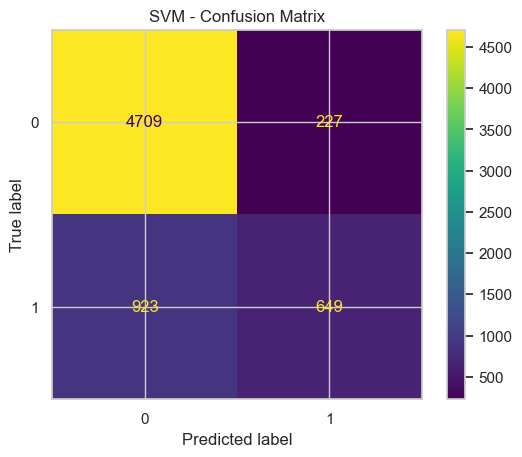

In [102]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("\nSVM")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))
ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test)
plt.title("SVM - Confusion Matrix")
plt.show()


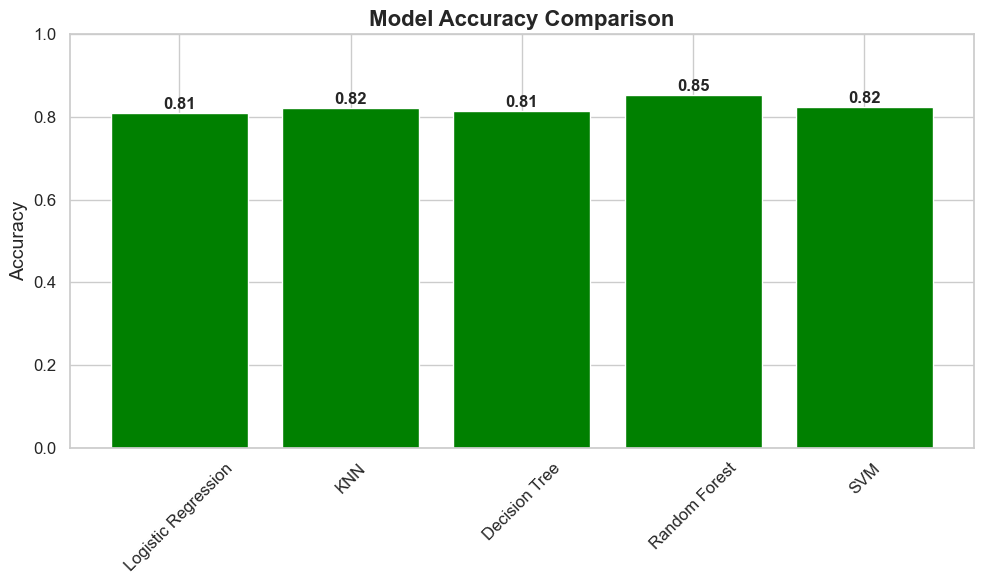

In [ ]:
import matplotlib.pyplot as plt


accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "KNN": accuracy_score(y_test, y_pred_knn),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm)
}


plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='green')
plt.title("Model Accuracy Comparison", fontsize=16, fontweight='bold')
plt.ylabel("Accuracy", fontsize=14)
plt.ylim(0, 1)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# عرض القيم فوق الأعمدة
for i, (model, acc) in enumerate(accuracies.items()):
    plt.text(i, acc + 0.01, f"{acc:.2f}", ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()



Logistic Regression
Accuracy: 0.8085433312845728
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      4936
           1       0.68      0.39      0.50      1572

    accuracy                           0.81      6508
   macro avg       0.76      0.67      0.69      6508
weighted avg       0.79      0.81      0.79      6508



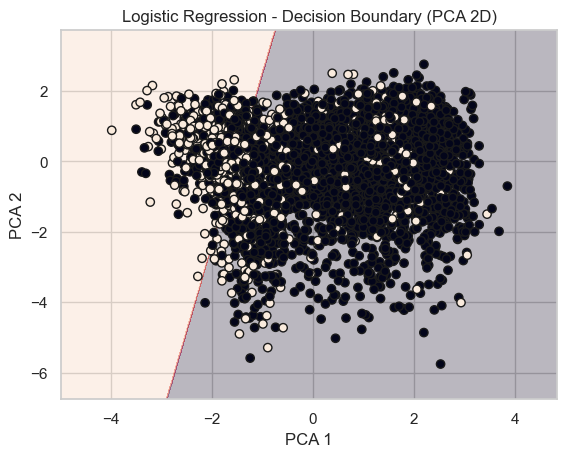


KNN
Accuracy: 0.8206822372464659
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      4936
           1       0.65      0.55      0.60      1572

    accuracy                           0.82      6508
   macro avg       0.76      0.73      0.74      6508
weighted avg       0.81      0.82      0.82      6508



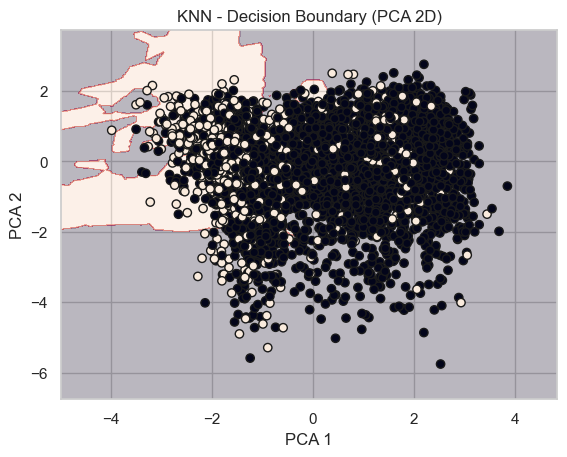


Decision Tree
Accuracy: 0.8154578979717271
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4936
           1       0.62      0.61      0.62      1572

    accuracy                           0.82      6508
   macro avg       0.75      0.75      0.75      6508
weighted avg       0.81      0.82      0.82      6508



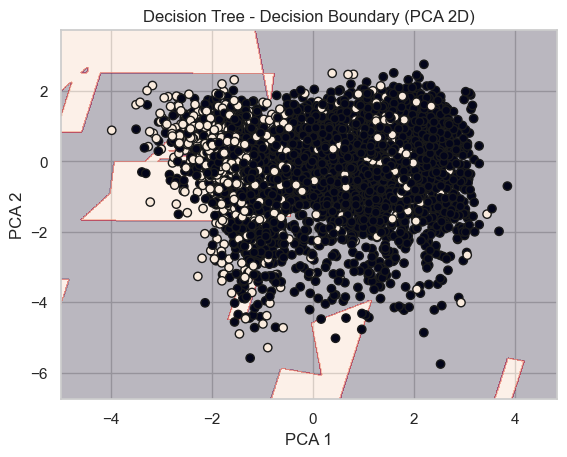


Random Forest
Accuracy: 0.8511063306699447
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4936
           1       0.74      0.59      0.66      1572

    accuracy                           0.85      6508
   macro avg       0.81      0.76      0.78      6508
weighted avg       0.84      0.85      0.85      6508



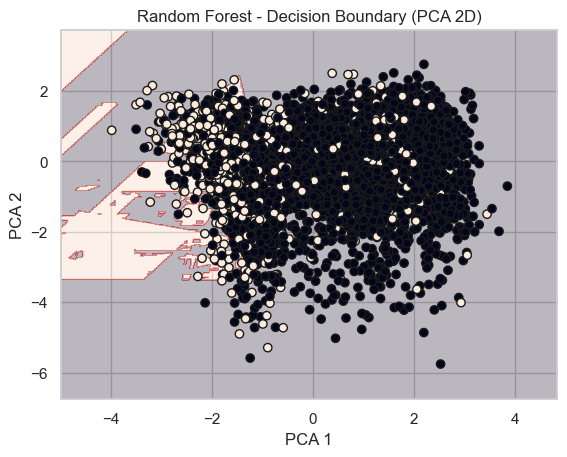


SVM
Accuracy: 0.8232944068838353
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4936
           1       0.74      0.41      0.53      1572

    accuracy                           0.82      6508
   macro avg       0.79      0.68      0.71      6508
weighted avg       0.81      0.82      0.80      6508



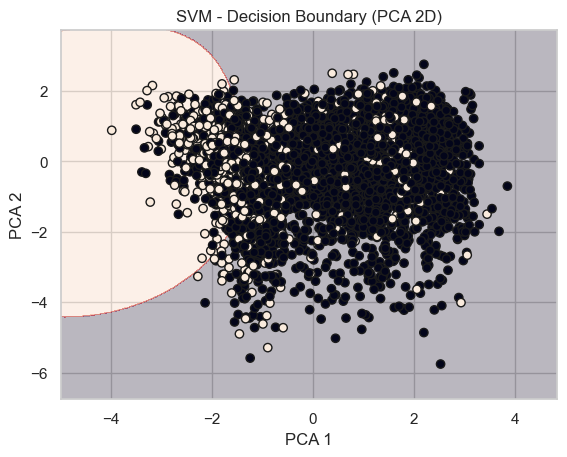

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC())
]


model_names = []
accuracies = []

# ⬇️ PCA لتصوير الـ 2D
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)
X_train_pca = pca.transform(X_train)

# ⬇️ رسم الحدود + التقارير
for name, model in models:
    print(f"\n{name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # حساب Accuracy وتخزينها
    acc = accuracy_score(y_test, y_pred)
    model_names.append(name)
    accuracies.append(acc)
    
    # عرض النتيجة
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))


    # رسم Decision Boundary
    h = .02
    x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
    y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z_input = np.c_[xx.ravel(), yy.ravel()]
    Z_input_original = pca.inverse_transform(Z_input)  
    Z = model.predict(Z_input_original)
    Z = pd.Series(Z).astype("category").cat.codes.values.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=pd.Series(y_test).astype("category").cat.codes, edgecolors='k', marker='o')
    plt.title(f"{name} - Decision Boundary (PCA 2D)")
    plt.xlabel("PCA 1")
    plt.ylabel("PCA 2")
    plt.show()


